# **Multiple Linear Regression**

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

## **Import Data**

In [4]:
df = pd.read_csv('/content/drive/MyDrive/TEC/Cuadernos Machine Learning/Datasets/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## **Data Visualization**

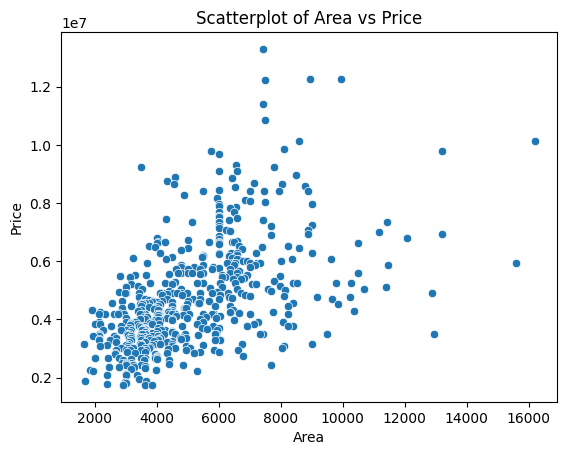

In [7]:
# plotting a scatterplot
sns.scatterplot(x='area',
                y='price', data=df)
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Scatterplot of Area vs Price')
plt.show()

## **Numerical Data**

In [10]:
# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

In [11]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [12]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


## **Dummy Variables**

In [13]:
#Variables dummy
status = pd.get_dummies(df['furnishingstatus'])
status.head()

,furnished,semi-furnished,unfurnished
0,True,False,False
1,True,False,False
2,False,True,False
3,True,False,False
4,True,False,False


In [14]:
status = pd.get_dummies(df['furnishingstatus'], drop_first = True)
df = pd.concat([df, status], axis = 1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,False,False


In [15]:
df.drop(['furnishingstatus'], axis = 1, inplace = True)

In [16]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


## **Feature and target variables**

In [18]:
# creating feature and target variables
X = df.drop('price',axis= 1)
y = df['price']

## **Split data for training and testing**

In [19]:
# creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

## **Linear Regression Model**

In [22]:
# creating a regression model
model = LinearRegression()

## **Training**

In [23]:
# fitting the model
model.fit(X_train,y_train)

LinearRegression()

## **Predictions on test set**

In [24]:
# making predictions
predictions = model.predict(X_test)

## **Model Evaluation**

In [25]:
# model evaluation
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  1220122964044.2449
mean_absolute_error :  826286.4684196459


## **Prediction on a test sample**

In [30]:
x_new = {
    'area': 7420,
    'bedrooms': 3,
    'bathrooms': 1,
    'stories': 3,
    'mainroad': 0,
    'guestroom': 2,
    'basement': 1,
    'hotwaterheating': 0,
    'airconditioning': 1,
    'parking': 1,
    'prefarea': 1,
    'semi-furnished': 1,
    'unfurnished': 0,
}

In [35]:
# Convert the dictionary to a pandas DataFrame
x_new_df = pd.DataFrame([x_new])

# making predictions
y_new = model.predict(x_new_df)

print(f"The predicted price for the new sample is: ${y_new[0]:,.2f} USD")

The predicted price for the new sample is: $7,499,231.10 USD
